In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv("depression_dataset_reddit.csv")

In [14]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [16]:
df.describe(include = 'all')

,clean_text,is_depression
count,7731,7731.000000
unique,7650,NaN
top,i want to be dead ive been suicidal for year i...,NaN
freq,8,NaN
mean,NaN,0.495537
std,NaN,0.500012
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [17]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [18]:
df.is_depression.value_counts()

is_depression
0    3900
1    3831
Name: count, dtype: int64

<Axes: ylabel='count'>

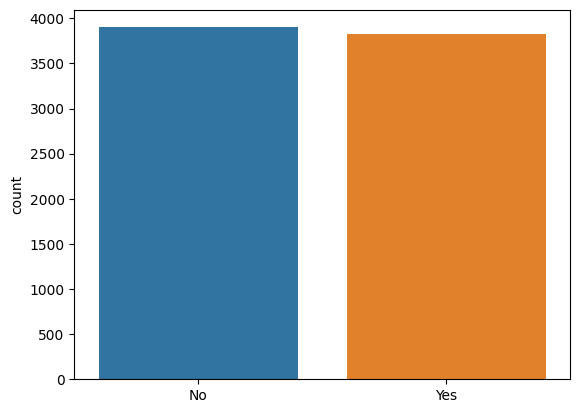

In [19]:
sns.barplot(data = df, x = ['No', 'Yes'], y = df.is_depression.value_counts())

### WordCloud Visualization

In [20]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

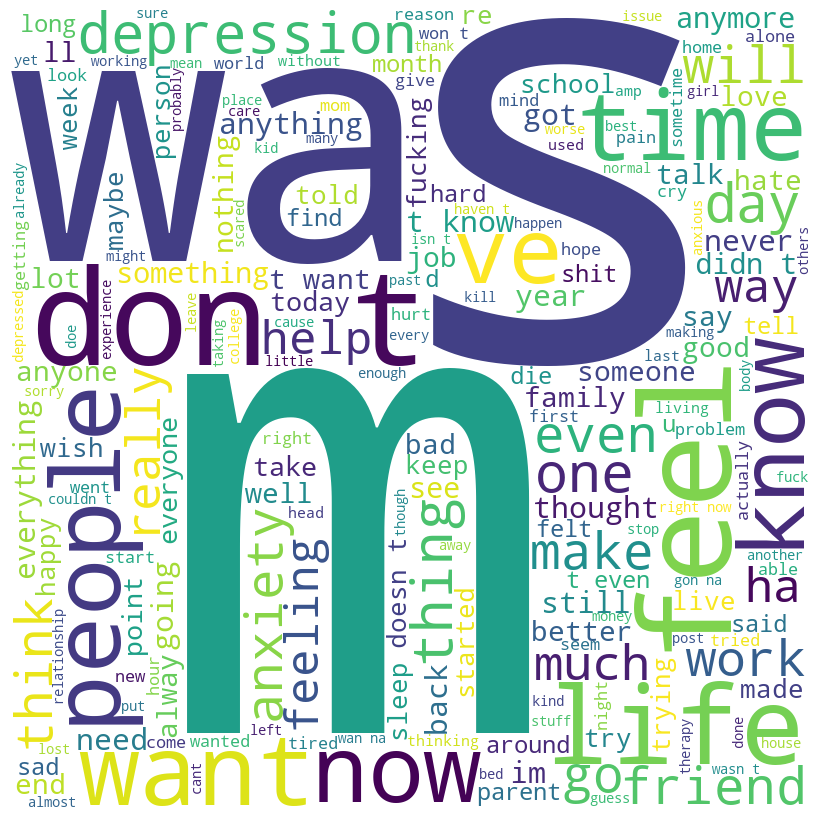

In [21]:
from wordcloud import WordCloud
comment_words = ''

# iterate through the csv file
for val in df.clean_text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [22]:
df.clean_text[0]

'we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private contact i e pm chat

### Tokenization

In [23]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [24]:
from nltk.tokenize import word_tokenize

In [25]:
# Function to tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    return tokens

In [26]:
# Apply tokenization to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(tokenize_text)

### Removing stopwords

In [27]:
# nltk stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Function to remove stopwords
def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text if word.lower() not in stopwords]

  return text


In [29]:
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [30]:
df.head()

,clean_text,is_depression
0,"[understand, people, reply, immediately, op, i...",1
1,"[welcome, r, depression, check, post, place, t...",1
2,"[anyone, else, instead, sleeping, depressed, s...",1
3,"[kind, stuffed, around, lot, life, delaying, i...",1
4,"[sleep, greatest, comforting, escape, whenever...",1


### Applying Lemmatization

In [31]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Function to perform lemmatization on a text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize each word
    return " ".join(lemmatized_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Apply lemmatization to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [33]:
df.head()

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


### Train Test Split

In [34]:
X = df['clean_text']
y = df['is_depression']

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697)

### TFIDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Training

### Model Function

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report




from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [39]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : SVM (Support Vector Machine)

In [40]:
# Initialize the model
svm = SVC(kernel='linear', random_state=0, probability=True)


Train ROC AUC: 0.9846966684607696
Test ROC AUC: 0.95480080094134


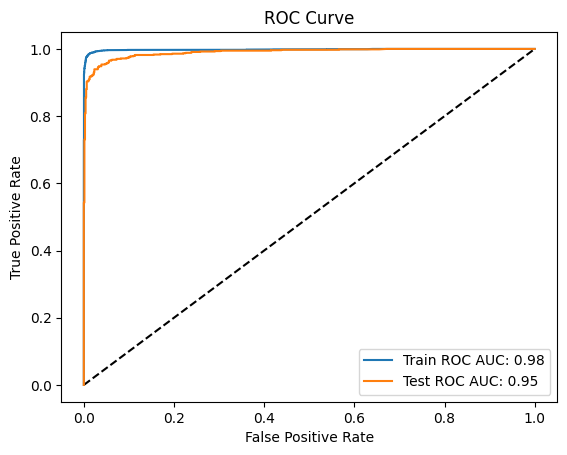


Confusion Matrix:


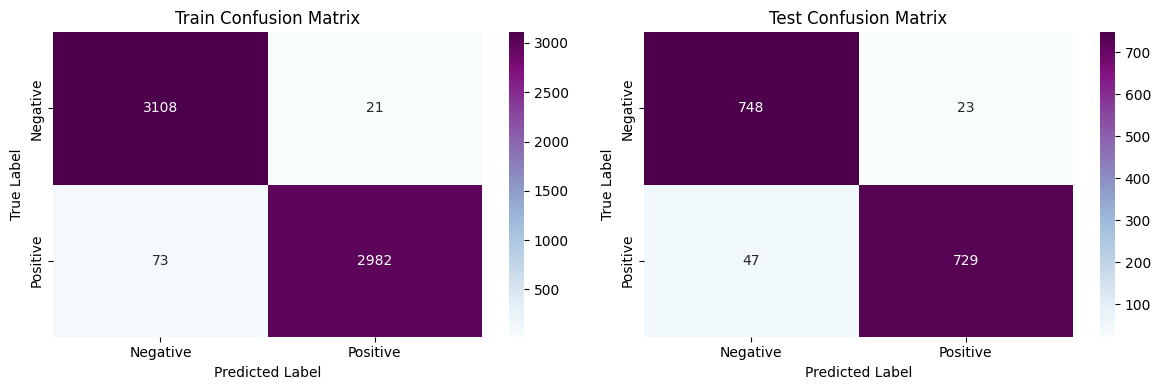


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.977051 | 0.993289 |   0.985103 | 3129        |
| 1            |    0.993007 | 0.976105 |   0.984483 | 3055        |
| accuracy     |    0.984799 | 0.984799 |   0.984799 |    0.984799 |
| macro avg    |    0.985029 | 0.984697 |   0.984793 | 6184        |
| weighted avg |    0.984934 | 0.984799 |   0.984797 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.940881 | 0.970169 |   0.9553   |  771        |
| 1            |    0.969415 | 0.939433 |   0.954188 |  776        |
| accuracy     |    0.954751 | 0.954751 |   0.954751 |    0.954751 |
| macro avg    |    0.955148 | 0.954801 |   0.954744 | 1547        |
| weighted avg |    0.955194 | 0.954751 |   

In [41]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [42]:
score['SVM'] = svm_score
score

,SVM
Precision Train,0.984934
Precision Test,0.955194
Recall Train,0.984799
Recall Test,0.954751
Accuracy Train,0.984799
Accuracy Test,0.954751
ROC-AUC Train,0.984697
ROC-AUC Test,0.954801
F1 macro Train,0.984797
F1 macro Test,0.954743


### ML Model - 2 : Xtreme Gradient Boosting

In [43]:
# Initialize the model
xgb_model = xgb.XGBClassifier()


Train ROC AUC: 0.9813459328524301
Test ROC AUC: 0.9548133365424472


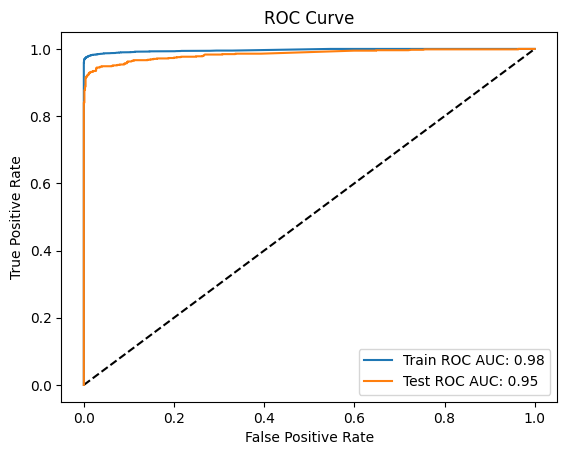


Confusion Matrix:


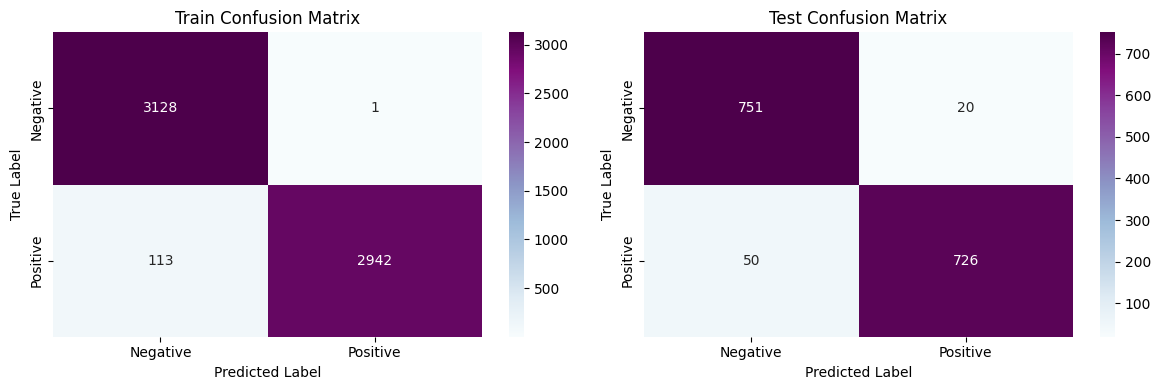


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.965134 | 0.99968  |   0.982104 | 3129        |
| 1            |    0.99966  | 0.963011 |   0.980994 | 3055        |
| accuracy     |    0.981565 | 0.981565 |   0.981565 |    0.981565 |
| macro avg    |    0.982397 | 0.981346 |   0.981549 | 6184        |
| weighted avg |    0.982191 | 0.981565 |   0.981555 | 6184        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.937578 | 0.97406  |   0.955471 |  771        |
| 1            |    0.97319  | 0.935567 |   0.954008 |  776        |
| accuracy     |    0.954751 | 0.954751 |   0.954751 |    0.954751 |
| macro avg    |    0.955384 | 0.954813 |   0.954739 | 1547        |
| weighted avg |    0.955442 | 0.954751 |   

In [44]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train_tfidf, X_test_tfidf, y_train, y_test)

In [45]:
score['XGB'] = xgb_score
score

,SVM,XGB
Precision Train,0.984934,0.982191
Precision Test,0.955194,0.955442
Recall Train,0.984799,0.981565
Recall Test,0.954751,0.954751
Accuracy Train,0.984799,0.981565
Accuracy Test,0.954751,0.954751
ROC-AUC Train,0.984697,0.981346
ROC-AUC Test,0.954801,0.954813
F1 macro Train,0.984797,0.981555
F1 macro Test,0.954743,0.954737


### DL Model - 1 : Bert CNN

In [46]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]['clean_text']
        label = self.data.iloc[index]['is_depression']

        inputs = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [49]:
# Create DataLoader for training and testing data
train_dataset = CustomDataset(train_df, tokenizer)
test_dataset = CustomDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Set up the training parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * 3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [50]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()

    average_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Loss: {average_train_loss}")

KeyboardInterrupt: 

In [ ]:
model.eval()
all_predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].cpu().numpy()

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1).cpu().numpy()

        all_predictions.extend(predictions)
        true_labels.extend(labels)


In [ ]:
accuracy = accuracy_score(true_labels, all_predictions)
classification_rep = classification_report(true_labels, all_predictions, target_names=['Not Depressed', 'Depressed'])

print(f"Test Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)
model.save_weights("bert.pkl")

## Pickling model to deploy

In [ ]:
# Import pickle
import pickle
# Save the tfidf_vectorizer
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))